In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import scipy as sp
import pandas as pd
# import geopandas as gpd
# import geoplot as gplt
from shapely.geometry import Point
import shapely
import reverse_geocoder as rg

import sklearn as sk
import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.font_manager as fm
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set(rc={'figure.figsize':(13.7,10.27)})
sns.set_style("whitegrid")
sns.set_color_codes()

In [2]:
from dask.distributed import Client
import dask.bag as db
import dask.dataframe as dd
import dask.array as da
import dask

from ast import literal_eval
from collections.abc import MutableMapping
from collections import Counter, defaultdict
# import h5py
import io
import os
import math

In [3]:
from sklearn.linear_model import Ridge, RidgeCV, SGDRegressor
from sklearn.cluster import DBSCAN, KMeans

In [4]:
ALGO_DBSCAN = "DBSCAN"
ALGO_KMEANS = "KMEANS"

In [5]:
client = Client(n_workers=8)
client

Client Scheduler: tcp://127.0.0.1:33511 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 8 Cores: 16 Memory: 33.65 GB


In [6]:
joined_df = dd.read_csv('data/joined_df.csv').compute()
joined_df = joined_df.loc[:, ~joined_df.columns.str.match('Unnamed')]
joined_df.columns

Index(['rating', 'reviewerName', 'categories', 'gPlusPlaceId', 'gPlusUserId',
       'user_lat', 'user_long', 'placeName', 'price', 'address', 'place_lat',
       'place_long'],
      dtype='object')

In [7]:
def places_filter(df, lat_l, lat_h, lon_l, lon_h):
    return df[(lat_l <= df.place_lat ) & (df.place_lat <= lat_h) & (lon_l <= df.place_long) & (df.place_long <= lon_h)]

In [8]:
%%time
usa_df = places_filter(joined_df, 19.50139, 64.85694, -161.75583, -68.01197)
usa_df = usa_df.dropna(subset=["place_lat", "place_long"], axis=0)
usa_df.shape

CPU times: user 408 ms, sys: 57.7 ms, total: 465 ms
Wall time: 455 ms


(2285757, 12)

In [9]:
unique_gps = list(usa_df.groupby(['place_lat', 'place_long']).groups)
gps_df = pd.DataFrame(unique_gps, columns=["place_lat", "place_long"])
del usa_df

In [10]:
def plot_clustering(algorithm, hparam):
    configured_algorithm = None
    if algorithm is ALGO_KMEANS: configured_algorithm = KMeans(n_clusters=hparam["n_clusters"], random_state=42)
    elif algorithm is ALGO_DBSCAN: configured_algorithm = DBSCAN(eps=hparam["eps"], min_samples=hparam["min_samples"])
    print("Configure algorithm Completed ")
        
    configured_algorithm.fit(unique_gps)
    gps_df[algorithm] = configured_algorithm.labels_
    print("Clustering Completed ")
    
    print("Initiating Plotting...")
    sns.scatterplot(data=gps_df, x='place_long', y='place_lat', hue=algorithm, palette="deep")

## Kmeans
1. Configure the number of clusters with `n_clusters`
2. Randomly Select n distinct data points, and set them as initial cluster centers
3. For each data point, measure the distance from the each cluster center, and classify it as the cluster whose distance is the shortest
4. After done, calculate the mean of each cluster, and move the cluster center to the mean
5. Go to 3 til the mean of cluster hardly changes

Configure algorithm Completed 
Clustering Completed 
Initiating Plotting...


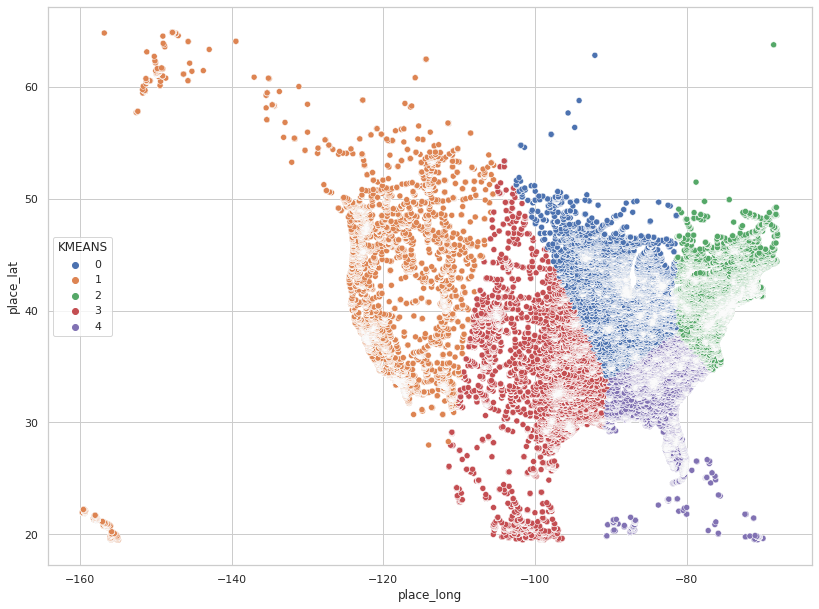

In [11]:
hparam = {
    "n_clusters": 5
}
plot_clustering(ALGO_KMEANS, hparam)

Configure algorithm Completed 
Clustering Completed 
Initiating Plotting...


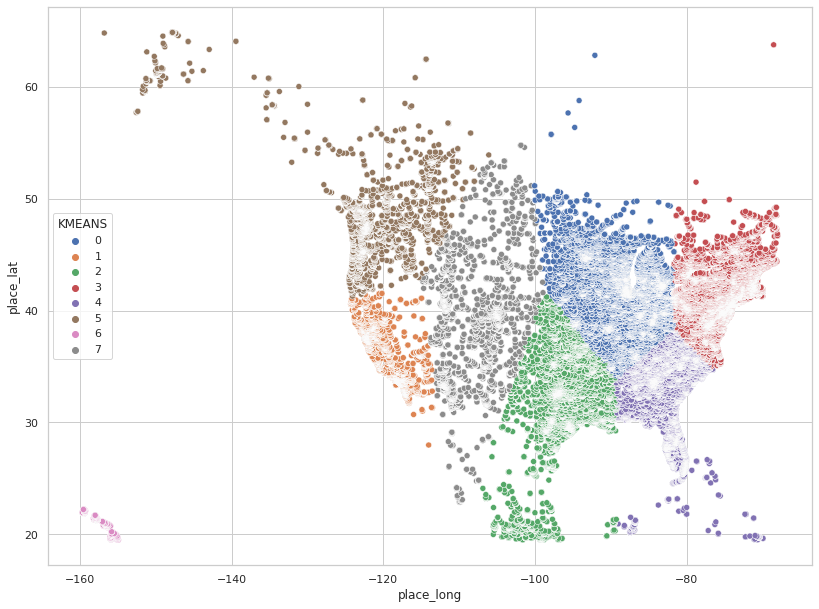

In [16]:
hparam = {
    "n_clusters": 8
}
plot_clustering(ALGO_KMEANS, hparam)

Configure algorithm Completed 
Clustering Completed 
Initiating Plotting...


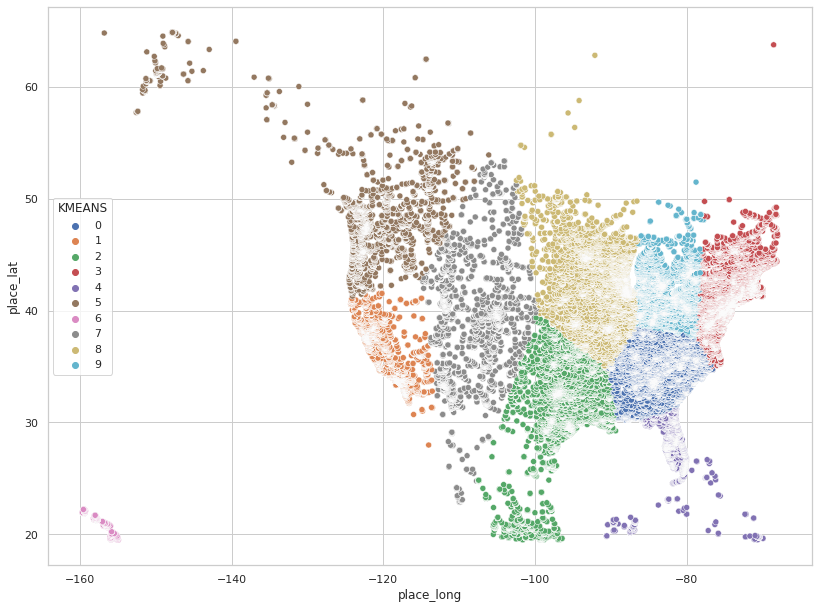

In [12]:
hparam = {
    "n_clusters": 10
}
plot_clustering(ALGO_KMEANS, hparam)